# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

In [3]:
cities

['amderma',
 'karaul',
 'leku',
 'butaritari',
 'ucluelet',
 'atuona',
 'kaitangata',
 'mikuni',
 'kerema',
 'yellowknife',
 'hermanus',
 'barrow',
 'yerofey pavlovich',
 'chapais',
 'iqaluit',
 'talnakh',
 'dikson',
 'rikitea',
 'kedougou',
 'sao joao da barra',
 'arraial do cabo',
 'wewak',
 'andrushivka',
 'ushuaia',
 'saint-philippe',
 'meulaboh',
 'belushya guba',
 'cestas',
 'busselton',
 'tuktoyaktuk',
 'phan rang',
 'albany',
 'ponta delgada',
 'prachuap khiri khan',
 'hobart',
 'hagersville',
 'punta arenas',
 'monrovia',
 'la ronge',
 'jamestown',
 'honiara',
 'new norfolk',
 'guaratinga',
 'chokurdakh',
 'gambiran',
 'kapaa',
 'ngukurr',
 'lebu',
 'ahipara',
 'namibe',
 'mys shmidta',
 'atar',
 'vaini',
 'norman wells',
 'mataura',
 'nizhneyansk',
 'touros',
 'umzimvubu',
 'bud',
 'sao filipe',
 'tuatapere',
 'hamilton',
 'hilo',
 'bredasdorp',
 'puerto ayora',
 'high prairie',
 'pitimbu',
 'road town',
 'thompson',
 'porto novo',
 'madingou',
 'saleaula',
 'karratha',
 'juc

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Block for json

# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL based on current element in units
query_url = url + "appid=" + weather_api_key + "&q=" + city 

# Get weather data
response = requests.get(query_url)
city_json = response.json()
print(city_json)

{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 295.79, 'feels_like': 294.25, 'temp_min': 293.15, 'temp_max': 297.04, 'pressure': 1000, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 262, 'gust': 4.02}, 'clouds': {'all': 47}, 'dt': 1611964335, 'sys': {'type': 3, 'id': 2019390, 'country': 'AU', 'sunrise': 1611947470, 'sunset': 1611999521}, 'timezone': 39600, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}


In [5]:
# Pretty print block to reference while building loop code
url = "http://api.openweathermap.org/data/2.5/weather?"

print('Beginning Data Retrieval')
print('-----------------------------')


# Build query URL based on current element in units
query_url = url + "appid=" + weather_api_key + "&q=" + 'caravelas' 

# Get weather data
response = requests.get(query_url).json()

pprint(response)

Beginning Data Retrieval
-----------------------------
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -17.7125, 'lon': -39.2481},
 'dt': 1611964338,
 'id': 3466980,
 'main': {'feels_like': 300.48,
          'grnd_level': 1014,
          'humidity': 81,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 298.06,
          'temp_max': 298.06,
          'temp_min': 298.06},
 'name': 'Caravelas',
 'sys': {'country': 'BR', 'sunrise': 1611908566, 'sunset': 1611955041},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 51, 'speed': 2.83}}


In [6]:
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Lists created for appendings API data
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
final_cities = []

# Loop header code
print('Beginning Data Retrieval')
print('-----------------------------')

# Empty counter for record number
city_count = 0

# Looping through list of cities
for city in cities:
    # Build query URL based on current element in units
    query_url = url + "appid=" + weather_api_key + "&q=" + city 

    # Get weather data
    response = requests.get(query_url).json()
    
    city_count = city_count + 1
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        final_cities.append(response['name'])
        print(f"Processing Record {city_count} | {city}")

        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 3 | leku
Processing Record 4 | butaritari
Processing Record 5 | ucluelet
Processing Record 6 | atuona
Processing Record 7 | kaitangata
Processing Record 8 | mikuni
Processing Record 9 | kerema
Processing Record 10 | yellowknife
Processing Record 11 | hermanus
Processing Record 12 | barrow
Processing Record 13 | yerofey pavlovich
Processing Record 14 | chapais
Processing Record 15 | iqaluit
Processing Record 16 | talnakh
Processing Record 17 | dikson
Processing Record 18 | rikitea
Processing Record 19 | kedougou
Processing Record 20 | sao joao da barra
Processing Record 21 | arraial do cabo
Processing Record 22 | wewak
Processing Record 23 | andrushivka
Processing Record 24 | ushuaia
Processing Record 25 | saint-philippe
Processing Record 26 | meulaboh
City not found. Skipping...
Processing Record 28 | cestas
Processing Record 29 | busselton
Processing Record 

Processing Record 252 | puerto ayacucho
Processing Record 253 | ponta do sol
Processing Record 254 | hami
Processing Record 255 | katsuura
Processing Record 256 | veracruz
Processing Record 257 | minuri
Processing Record 258 | olafsvik
Processing Record 259 | huarmey
Processing Record 260 | kahului
Processing Record 261 | husavik
Processing Record 262 | komsomolskiy
Processing Record 263 | filingue
Processing Record 264 | nome
Processing Record 265 | quatre cocos
Processing Record 266 | namatanai
Processing Record 267 | salalah
City not found. Skipping...
Processing Record 269 | ribeira grande
City not found. Skipping...
Processing Record 271 | mastung
Processing Record 272 | porto belo
Processing Record 273 | sisimiut
Processing Record 274 | vestmannaeyjar
Processing Record 275 | lucapa
Processing Record 276 | rozkishne
Processing Record 277 | ilulissat
Processing Record 278 | ishinomaki
Processing Record 279 | kiunga
Processing Record 280 | raga
Processing Record 281 | rorvik
City no

Processing Record 503 | tezu
Processing Record 504 | uusikaupunki
Processing Record 505 | igrim
Processing Record 506 | henties bay
City not found. Skipping...
Processing Record 508 | ambovombe
City not found. Skipping...
Processing Record 510 | kerrobert
Processing Record 511 | kudahuvadhoo
City not found. Skipping...
Processing Record 513 | ginir
Processing Record 514 | surt
Processing Record 515 | namsos
Processing Record 516 | panguna
Processing Record 517 | padang
Processing Record 518 | hanting
Processing Record 519 | goure
Processing Record 520 | lacolle
Processing Record 521 | bozoum
Processing Record 522 | iwaki
City not found. Skipping...
Processing Record 524 | pochutla
Processing Record 525 | strelka
City not found. Skipping...
Processing Record 527 | minot
Processing Record 528 | grand forks
Processing Record 529 | carrick-on-suir
Processing Record 530 | tura
Processing Record 531 | ukiah
Processing Record 532 | alap
Processing Record 533 | coihueco
Processing Record 534 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Created dataframe to hold city data from cities found in API
city_weather = pd.DataFrame({
    'City': final_cities,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date}
)
    
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leku,6.8667,38.4500,287.32,51,14,2.51,ET,1611964345
1,Butaritari,3.0707,172.7902,300.27,75,95,7.36,KI,1611964345
2,Ucluelet,48.9329,-125.5528,278.71,93,90,6.69,CA,1611964345
3,Atuona,-9.8000,-139.0333,299.11,76,5,8.77,PF,1611964318
4,Kaitangata,-46.2817,169.8464,286.48,75,80,3.58,NZ,1611964346


In [8]:
# Summary table to review data 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,5.150000e+02
mean,18.879390,24.775835,282.318893,73.864078,55.341748,3.581689,1.611964e+09
std,33.643389,91.015225,18.527237,19.661854,38.639757,2.535763,9.167588e+01
min,-54.800000,-175.200000,228.150000,5.000000,0.000000,0.020000,1.611964e+09
25%,-8.245000,-54.650000,271.815000,64.000000,20.000000,1.540000,1.611964e+09
50%,22.285500,25.619200,288.710000,78.000000,67.000000,3.090000,1.611964e+09
75%,47.399950,111.321750,297.140000,88.000000,91.500000,4.950000,1.611964e+09
max,78.218600,178.416700,307.150000,100.000000,100.000000,13.890000,1.611965e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# No cities with humidity greater than 100
city_weather[city_weather['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
# Keeping starter code in case file is re-run and humidity > 100 needs removed

In [11]:
# Keeping starter code in case file is re-run and humidity > 100 needs removed
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Keeping starter code in case file is re-run and humidity > 100 needs removed
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leku,6.8667,38.4500,287.32,51,14,2.51,ET,1611964345
1,Butaritari,3.0707,172.7902,300.27,75,95,7.36,KI,1611964345
2,Ucluelet,48.9329,-125.5528,278.71,93,90,6.69,CA,1611964345
3,Atuona,-9.8000,-139.0333,299.11,76,5,8.77,PF,1611964318
4,Kaitangata,-46.2817,169.8464,286.48,75,80,3.58,NZ,1611964346


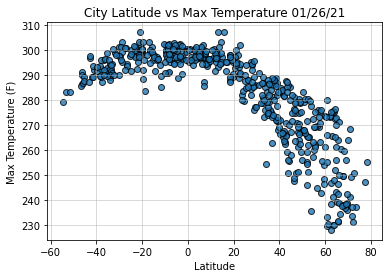

In [14]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Max Temperature 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_Temp.png')

# The above plot shows the relationship between a city's latitudinal position and the maximum temperature. There seems to be a correlation between cities closer to the equator (0) and having a higher max temperature. The dataset has many more cities north of the equator.

## Latitude vs. Humidity Plot

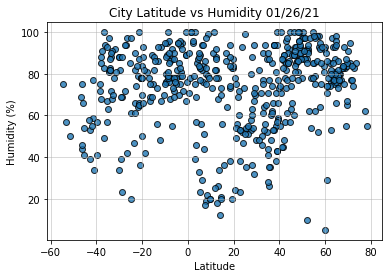

In [15]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Humidity'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Humidity 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_Humidity.png')

# The above plot shows the relationship between a city's latitudinal position and the humidity. There seems to be less of a distinct correlation between a city's latitudinal position and humidity.

## Latitude vs. Cloudiness Plot

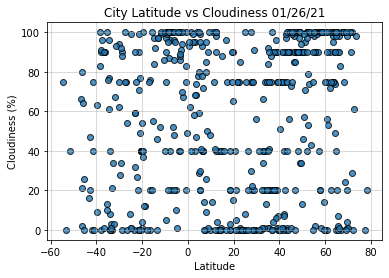

In [16]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Cloudiness 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

# The above plot shows the relationship between a city's latitudinal position and the percentage of cloud coverage. There does not seem to be a relationship between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

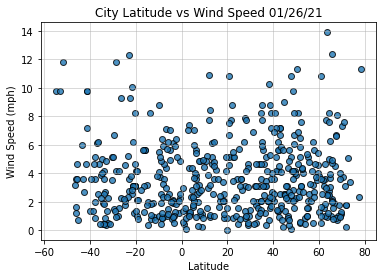

In [17]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Wind Speed'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Wind Speed 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_WindSpeed.png')

# The above plot shows the relationship between a city's latitudinal position and the wind speed. It seems inconclusive if there is a correlation between the two data points.

## Linear Regression

In [18]:
# Define each hemisphere for easier reference
northern_hemi = city_weather[city_weather["Lat"] > 0]
southern_hemi = city_weather[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7276886059787493


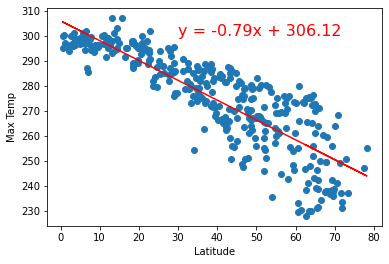

In [19]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,300),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.30442545264108617


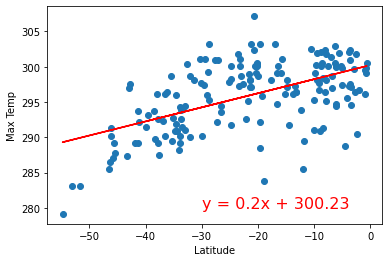

In [20]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,280),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/SHem_Lat_vs_Temp.png')

# The two plots above show the relationship between latitude and maximum temperature. The correlation is much stronger for cities in the northern hemisphere. We can tell this by the r-squared, but also by how many data points are near the regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0762692118935894


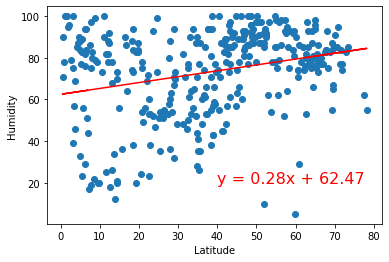

In [21]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12838047859374968


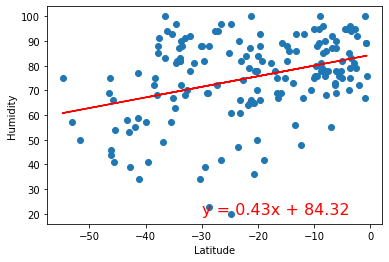

<Figure size 432x288 with 0 Axes>

In [22]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/SHem_Lat_vs_Humidity.png')

# The two plots above show the relationship between latitude and humidity. The correlation is again stronger for cities in the northern hemisphere. We can tell this by the r-squared, but also by how many data points are near the regression line – particularly in the top right quadrant of the northern hemisphere chart.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03653830619986441


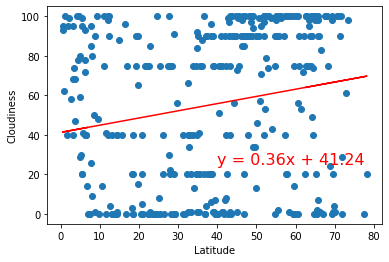

In [30]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10321921630746234


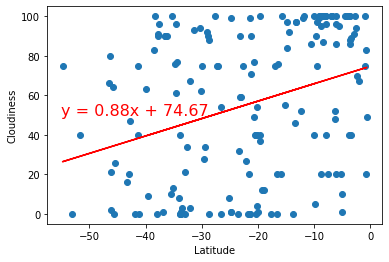

In [28]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/SHem_Lat_vs_Cloudiness.png')

# The two plots above show the relationship between latitude and cloudiness. The r-squared is low in both models, indicating a weak correlation.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005821631460112186


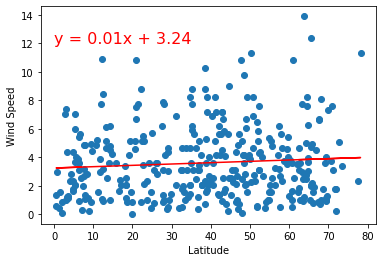

In [25]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_WindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027189795633850915


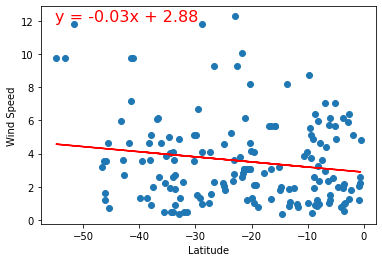

In [26]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,12),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/SHem_Lat_vs_WindSpeed.png')

# The two plots above show the relationship between latitude and wind speed. These are the weakest correlations, evident by the r-squared.


####  Export to csv

In [31]:
city_weather.to_csv('../output_data/cities_export.csv')